## **Практичне заняття 1, робота в R**


Пригадаємо спочатку деякі базові операціх в $R$.

Задомо вектор $X$ та присвоємо $x$ значення цього вектора:

In [2]:
c(1,2,3,4,5,6,7,8,9)
x<-c(1,2,3,4,5,6,7,8,9)
x

[1] 1 2 3 4 5 6 7 8 9

[1] 1 2 3 4 5 6 7 8 9

Задавати матрицю можна, заповнюючи елементи по  стовбчикам, або вказавши  byrow= TRUE  -- по рядкам. У першому випадку ми вказуємо кількість рядків, а по стовбчикам матриця заповнюється автоматично.  

In [4]:
matrix(x,nrow=3)

1,4,7
2,5,8
3,6,9


In [7]:

matrix(x,nrow=3,byrow= TRUE)

1,2,3
4,5,6
7,8,9


Задамо тепер матрицю та порахуємо її детермінант:

In [ ]:
A<-matrix(x,nrow=3)
det(A)

[1] 0

Вийшло 0, тому  змінимо матрицю (для подальших обчислень).

In [8]:
x<-c(1,2,3,4,5,6,7,8,8)
B<-matrix(x,nrow=3)
det(B)

[1] 3

Наступні функції означають, відповідно, транспоновану матрицю та  слід матриці $B$:

In [9]:
t(B)

1,2,3
4,5,6
7,8,8


В RStudio є вбудована функція tr(B) для обчислення сліду матриці. Для цього треба встановити пакет psych і завантажити бібліотеку:

install.packages("psych")

library("psych")

В Jupyter Notebook цей пакет, на жаль, не становиться:) Тому будемо обчислювати слід наступним чином:

In [ ]:
TrB<-sum(diag(B))
TrB

[1] 14

Добуток матриць та обернена матриця:

In [ ]:
A%*%B
solve(B)

30,66,95
36,81,118
42,96,141


-2.666667,3.333333,-1
2.666667,-4.333333,2
-1.000000,2.000000,-1


Тепер нагадаємо, як згенерувати виборку з нормальним розподілом. Нагадаємо, що можна також викликати справку наступним чином:  

In [ ]:
?dnorm

**dnorm**: density, **pnorm**: cumulative density (probbaility distribution), **qnorm**: quantile, **rnorm**: random variable

In [ ]:
dnorm(1,0,1,log=FALSE)

pnorm(1,0,1,log=FALSE)

qnorm(0.05,0,1,lower.tail = FALSE)   # F(x)=1-0.05

qnorm(0.05,0,1,lower.tail = TRUE)    # F(x)=0.05


[1] 0.2419707

[1] 0.8413447

[1] 1.644854

[1] -1.644854

Згеренуємо вибірку з 1000 н.о.р.в.в. з параметрами 0 та 1. Виведемо при цьому на екран перші 6:

In [ ]:
N<-rnorm(1000, 0, 1)
head(N)

[1] -2.0842238 -0.1374630  2.2265623  1.2931481  0.4119737  0.2530641

Побудуємо тепер гістограму. Обравши freq=FALSE, ми побудуємо графік щільності.  Для зручності, зробимо картинку заданого розміру.  Досить це зробити 1 раз у файлі.

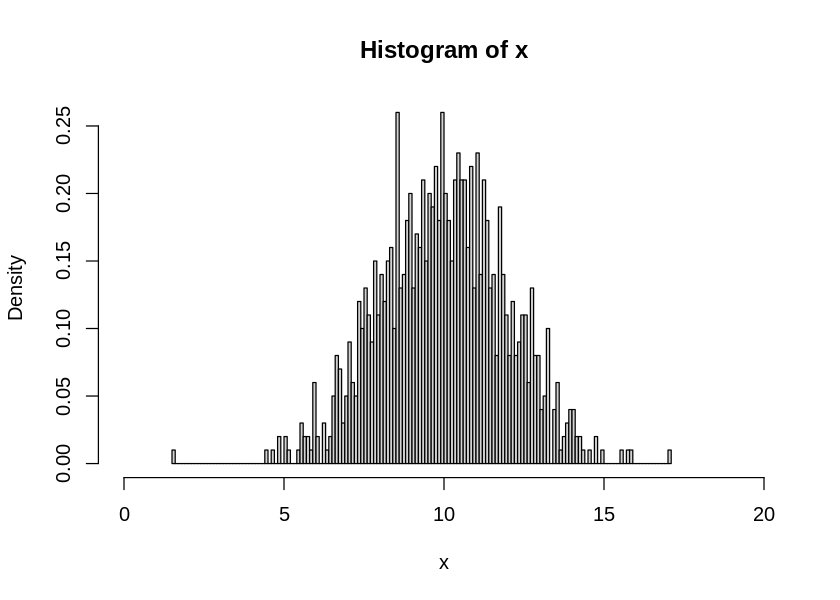

In [13]:
options(repr.plot.width=7, repr.plot.height=5)
x<-rnorm(1000,mean=10, sd=2)
hist(x,breaks=150,xlim=c(0,20),freq=FALSE)

Для того, щоб побудувати графік  абсолютних частот, задамо  freq=TRUE:

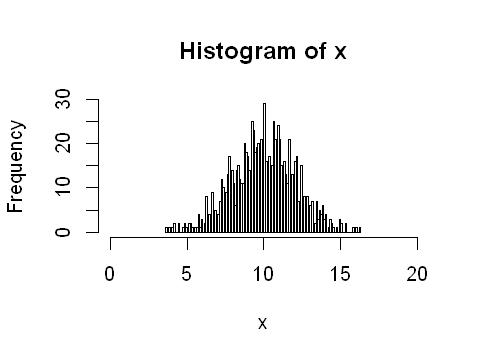

In [ ]:
hist(x,breaks=150,xlim=c(0,20),freq=TRUE)

Більше можна почитати _[тут](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist)_.

Пригадаємо також графік розподілу $\chi^2$.   Детальніше -  _[тут](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Chisquare)_ та _[тут](https://cran.r-project.org/web/packages/DPQ/vignettes/Noncentral-Chisq.pdf)_

[1] 0.0007897535

[1] 3.940299

[1] 3.940299

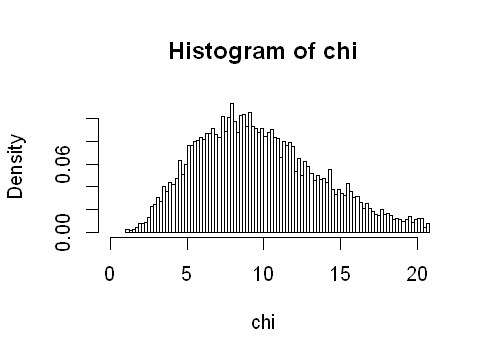

In [ ]:
chi<-rchisq(10000,df=10)
hist(chi,breaks=150,xlim=c(0,20),freq=FALSE)
dchisq(1, 10, ncp = 0, log= FALSE)
qchisq(0.05,10,lower.tail = TRUE)
qchisq(0.95,10,lower.tail = FALSE)

Для того, щоб вивчати багатовимірний нормальний розподіл, нам знадобляться наступні пакети і бібліотеки. Якщо у Вас  R version 3.6.3 та вище, то ці бібліотеки вже є вбудованими, тобто спеціальна інсталяція не потрібна.   

In [14]:
 install.packages("mvtnorm")
 install.packages("MASS")
 library(mvtnorm)
 library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Введемо вектор середніх і коваріаційну матрицю.

In [15]:
mean<-c(0,0)
mean
sig<-matrix(c(1, -.5, -.5, 1), nrow =2, byrow= FALSE)
sig

[1] 0 0

1.0,-0.5
-0.5,1.0


Генеруємо нормальний розподіл з цими середнім і коваріацією:

In [16]:
mv<-rmvnorm(1000, mean, sig)
head(mv)

0.46887724,-0.3842700
1.38975778,0.3959954
-0.42515737,1.5435610
0.02047061,0.1931655
-0.06456378,-0.1918425
-1.42383467,0.9413667


Згенеруємо тепер проекцію  щільності  на ХОY (kde = kernel density estimation) в точках вибірки.  Ми додаємо контур до графіку. Функція box()  добавляє "бокс" навколо малюнку.

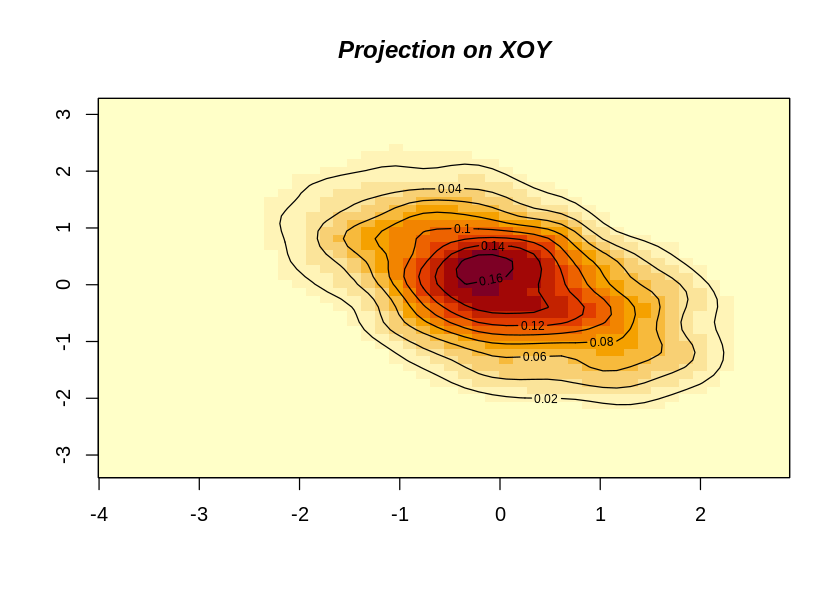

In [18]:
mv.kde <- kde2d(mv[,1], mv[,2], n = 50)
image(mv.kde)
contour(mv.kde, add = TRUE)
box()
title(main = "Projection on XOY", font.main = 4)

In [19]:
install.packages('ellipse')
library(ellipse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




Квадрат відстані Махаланобіса:
$$
\bigtriangleup^2 := (x-\mu)'\Sigma^{-1} (x-\mu)\leq R^2
$$

$\lambda_i$ -- власні числа $\Sigma$

$\sqrt{\lambda_i} R$  -- довжини півосей

Тепер намалюємо 'довірчі еліпси' рівня $p=$ 0.95, 0.99, 0.90. Також, побудуємо регресію на цьому ж малюнку графіки регресії $x$ на $y$ та $y$ на $x$.

$R^2$: розв'зок рівняння  ($\mu$ -- відоме):

$$
P(\bigtriangleup \leq R^2) = p, \quad  \bigtriangleup \sim \chi^2_d
$$

In [ ]:
y_on_x <- lm(mv[,2] ~ mv[,1])
x_on_y <- lm(mv[,1] ~ mv[,2])

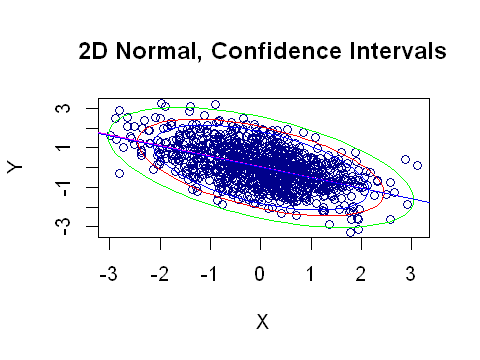

In [ ]:
rho = cor(mv)
plot(mv, xlab = "X", ylab = "Y",
     col = "dark blue",
     main = "2D Normal, Confidence Intervals")
lines(ellipse(rho,  level = .95), col="red")
lines(ellipse(rho, level = .99), col="green")
lines(ellipse(rho, level = .90), col="blue")
abline(y_on_x, col="magenta")
abline(x_on_y, col="blue")

Пригадаємо, що таке лінійна регресія у баготовимірному випадку.

В одновимірному випадку, при $p=q=1$, регресією $Y$ на $X$ є умовне матсподівання $Y$, якщо відоме $X$:
$$
\mathbb{E} \left( Y | X \right) =\min_{g}{\mathbb{E}\left( Y -g(X) \right)^{2}},
$$
де функція $g=g(X)$ - борелева.


Функція регресії має вигляд
$$
Y = \mu_{y}+\rho\frac{\sigma_{y}}{\sigma_{x}}\left(X-\mu_{x}\right).
$$
Аналогічно в $\mathbb{R}^{p+q}$ регресією $Y$ на $X$ є
$$
\mathbb{E} \left( Y \vert X \right) =\boldsymbol{\mu}_{y} + \boldsymbol{\Sigma}_{xy}\boldsymbol{\Sigma}_{xx}^{-1}\left( X-\boldsymbol{\mu}_{x} \right),
$$
та регресією $X$ на $Y$ є
$$
\mathbb{E} \left( X \vert Y \right) =\boldsymbol{\mu}_{x} + \boldsymbol{\Sigma}_{xy}\boldsymbol{\Sigma}_{yy}^{-1}\left( Y-\boldsymbol{\mu}_{y} \right).
$$
Тобто лінії регресії $\mathbb{E} \left( Y \vert X \right)$ у прикладі вище утворені за допомогою точок випадкової величини  $X\sim N(\mu_X, \sigma_X^2)$ та  $\mathbb{E} \left( Y \vert X \right)$.

Якщо дані треба зчитати з файлу, то найпростішим шляхом буде скопіювати файл в папку, де знаходиться  ваш ipynb файл і запустити read.table("file"). Можна добавити  header = F, якщо не виводимо назви стовбчиків.

In [ ]:
dat = read.table("T3_1_HEIGHTWT.DAT", header = F)
head(dat)

V1,V2,V3
1,69,153
2,74,175
3,68,155
4,70,135
5,72,172
6,67,150


## Перевірка нормальності

Як правило ми будемо використовувати вибірки нормального розподілу. Як перевірити на нормальність?

### Тест Колмогорова-Смірнова (Kolmogorov-Smirnoff test)}   


Тест Колмоговора-Смірнова перевіряє, чи збігається функція розподілу окремих спостережень вибірки $X$ з заданою (неперервною) функцією розподілу $F(x)$ на $\mathbb{R}$.
$$
\hat{F}_n(x)= \frac{1}{n} \sum_{k=1}^n I_{\xi_k<x}.
$$
Тестова статистика має вигляд
$$
\hat{\kappa}_n(X)= \sqrt{n} \sup_{x\in  \mathbb{R}}| \hat{F}_n(x)- F(x)|.
$$
Перевіряємо нульову гіпотезу
$$
H_0: \quad \mathbb{P}(\xi_1<x) = F(x) \quad \forall x\in \mathbb{R},
$$
 проти альтернативної
 $$
 H_1: \quad  \mathbb{P}(\xi_1<x) = G(x) \quad \forall x\in \mathbb{R}, \quad G(x)\neq F(x), \quad G\in C(\mathbb{R}).
 $$
За умови гіпотези статистика Колмогорова
$\hat{\kappa}_n$
слабко збігається до випадкової величини $\kappa$, яка має розподіл Колмогорова, тобто
$$
 \mathbb{P}(\kappa<x) = K(x)= \sum_{k=-\infty}^\infty (-1)^k \exp(-2k^2x^2).  
$$

Зауважимо, що це одновимірний тест, хоча існують узагальнення на багатовимірний випадок. Причина полягає у складності  визначення у багатовимірному випадку емпіричної функції розподілу $\hat{F}_n$.


В $R$  є вбудована функція, яка перевіряє гіпотезу $H_0$ за допомоги критерію Колмогорова-Смірнова:


ks.test(x, y, alternative = c("two.sided", "less", "greater"))


Тут $x$, $y$- вектори даних, причому  $y$ генерується за допомогою функції розподілу $F$.

Якщо ми перевіряємо, чи співпадає розподіл   $x$ із заданим розподілом $y$, то вказуємо $y$ явно.


In [ ]:
x = rnorm(50, -1, 1)
y = rnorm(50, -1, 1)
ks.test(x, y, alternative = "less")


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D^- = 0.32, p-value = 0.005976
alternative hypothesis: the CDF of x lies below that of y


Однобічний тест означає, що ми перевіряємо, де саме лежить вибіркова функція розподілу (CDF). Якщо
alternative = "less", то за умови виконання альтернативи CDF знаходиться знизу по відношенню до графіку справжньої функції розподілу, якщо alternative = "greater"-- то зверху.

In [ ]:
ks.test(x, y)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.08, p-value = 0.9977
alternative hypothesis: two-sided


Тут $D= \sup_{x\in  \mathbb{R}}| \hat{F}_n(x)- F(x)|$.

In [ ]:
ks.test(x, "pgamma", 3, 2)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.91906, p-value = 8.882e-16
alternative hypothesis: two-sided


## Тест Шапіро-Уілка (Shapiro-Wilk test)}   

Розглянемо вектор середніх та коваріаційну матрицю:
$$
m= \mathbb{E} X = (m_1,\dots,m_n), \quad V=  (cov(x_i,x_j)_{i,j=1}^n.
$$
Нехай тепер
$y= (y_1,\dots, y_n)$ - інша впорядкована виборка. За умови $y_i \sim N(\mu,\Sigma^2)$,  координати можна зобразити наступним чином:
$$
y_i= \mu+\sigma x_{i}, \quad i=1,\dots,n,
$$
для деяких $\mu$  та $\sigma^2$.
Оцінимо   $\mu$  та $\sigma^2$  методом наймених квадратів, тобто мінімізуємо
$$
( y- \mu1- \sigma m)' V  ( y- \mu1- \sigma m) \mapsto \min,
$$
де $1= (1,\dots,1)$. Отримаємо наступні оцінки:
$$
\hat{\mu}= \frac{m' V^{-1} (m1'- 1'm) V^{-1}}{ 1' V^{-1}1 m'V^{-1} m- (1'V^{-1} m)^2}, \quad
\hat{\sigma} =\frac{1^TV^{-1}(1m^T-m1^T)V^{-1}y}{1^TV^{-1}1 m^TV^{-1}m - (1^TV^{-1} m)^2}
$$
За умови симетричности, тобто
$1'V^{-1} m=0$, ці оцінки можна спростити та отримати
$$
\hat{\mu}= \frac{1}{n} \sum_{i=1}^n y_i, \quad \hat{\sigma}^2= \frac{m'V^{-1}y}{m'V^{-1} m}.
$$
Розглянемо $W$-статистику Шапіро-Уілка:  
$$
W= \frac{(\sum_{i=1}^n y_i a_i)^2}{\sum_{i=1}^n (y_i-\overline{y})^2},
$$
де $a= (a_1,\dots,a_n)= \frac{m'V^{-1}}{(m'V^{-1} V^{-1} m)^{1/2}}$.
За умови нормальності вибірки $X$, розподіл цієї статистики залежить лише від $n$  і є  табульованим (хоча точне аналітичне зображення невідоме). Тому цю статистику можна використовувати для перевірки гіпотези про нормальність. В залежності від того, скільки точок попадає в ''допустимий інтервал'', таке буде значення статистики $W$. Критичними значеннями є такі значення емпіричної  $W$, яка менша за табличне значення. У цьому випадку нульова гіпотеза відхиляється.  Іншими словами,
$H_0$ відхиляємо, якщо $W<c_{\alpha,n}$,
де
$$
\alpha= \mathbb{P} (W<c_{\alpha,n}| H_0).
$$


In [ ]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.97248, p-value = 0.291


Існує багатовимірний аналог тесту Шапіро-Уілка. Нехай  $X= (X_1,\dots,X_n)$ вибірка випадкових векторів з $\mathbb{R}^p$.

Розглядається нульова гіпотеза
$H_0$: $X_i \sim N_p(\mu,\Sigma)$, $i=1,\dots, n$, $\mu$, $\Sigma$ - невідомі.

Нехай $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$,
$$
S= \frac{1}{n} \sum_{i=1}^n (X_i-\bar{X})(X_i-\bar{X}).
$$
Розглянемо нормовані  вектори
$$
Z_j^* = S^{-1/2} (X_j-\bar{X}), \quad Z_j^* = (Z_{1j},\dots, Z_{pj}).
$$
В якості узагальненої статистика Шапіро--Уілка можна взяти
$$
W^*= \frac{1}{p} \sum_{i=1}^p W_{Z_i},
$$
де
$W_{Z_i}$- статистика Шапіро-Уілкса для (одновимірних!) спостепежень $ (Z_{i1}, \dots, Z_{in})$, $i=1,\dots, p$.
Як і в одновимірному випадку, $H_0$ відхиляємо, якщо $W^*<c_{\alpha, p,n}$,
де
$$
\alpha= \mathbb{P} (W^*<c_{\alpha,p,n}| H_0).
$$
Для перевірки нормальності випадкових векторів застосовується, наприклад, пакет
mvnormtest, який потрібно встановити за завантажити відповідну бібліотеку. Для перевірки нормальності застосовується функція   (тут $DataX$  у форматі матриці.)
